In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import levene, f_oneway

# Задача 1

# Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

In [26]:
# Выводим ДатаФрейм с id юзерами и датой регистраций.
registration_data = pd.read_csv('C:/курс/final_project/problem1-reg_data (1).csv', sep=';')
registration_data = registration_data.head(10000)
registration_data

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
9995,1358884095,11082
9996,1358889351,11084
9997,1358894606,11087
9998,1358899861,11088


In [27]:
# Выведем еще один ДатаФрейм так же с юзерами и датами аутентификаций.
authentification_data = pd.read_csv('C:/курс/final_project/problem1-auth_data (1).csv', sep=';')
authentification_data = authentification_data.head(10000)
authentification_data

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2
...,...,...
9995,1254103814,710
9996,1254106012,1417
9997,1254109370,1512
9998,1254110715,728


In [28]:
# посмотрим на типы данных
registration_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [29]:
authentification_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [30]:
# Для начала переведем колонки "auth_ts" и "reg_ts" в формат времени и оставим только год месяц и день.
registration_data['full_date_of_registration'] = pd.to_datetime(registration_data['reg_ts'], unit='s').dt.date
authentification_data['full_date_of_authentification'] = pd.to_datetime(authentification_data['auth_ts'], unit='s').dt.date

In [31]:
registration_data

,reg_ts,uid,full_date_of_registration
0,911382223,1,1998-11-18
1,932683089,2,1999-07-22
2,947802447,3,2000-01-13
3,959523541,4,2000-05-28
4,969103313,5,2000-09-16
...,...,...,...
9995,1358884095,11082,2013-01-22
9996,1358889351,11084,2013-01-22
9997,1358894606,11087,2013-01-22
9998,1358899861,11088,2013-01-23


In [32]:
authentification_data

,auth_ts,uid,full_date_of_authentification
0,911382223,1,1998-11-18
1,932683089,2,1999-07-22
2,932921206,2,1999-07-25
3,933393015,2,1999-07-31
4,933875379,2,1999-08-05
...,...,...,...
9995,1254103814,710,2009-09-28
9996,1254106012,1417,2009-09-28
9997,1254109370,1512,2009-09-28
9998,1254110715,728,2009-09-28


In [33]:
# Проверим на пропуски в данных. Убедимся что пропусков нет.
registration_data.isna().sum()

reg_ts                       0
uid                          0
full_date_of_registration    0
dtype: int64

In [34]:
authentification_data.isna().sum()

auth_ts                          0
uid                              0
full_date_of_authentification    0
dtype: int64

In [35]:
# Количество уникальных пользователей.
registration_data.uid.nunique()

10000

In [36]:
authentification_data.uid.nunique()

1360

In [37]:
# максимальное количество зарегистрировавшихся было 2020-09-22
registration_data.groupby('full_date_of_registration', as_index=False) \
    .agg({'uid': 'count'}) \
    .sort_values('uid', ascending=False)

,full_date_of_registration,uid
2304,2013-01-18,17
2306,2013-01-20,17
2300,2013-01-14,17
2291,2013-01-05,16
2308,2013-01-22,16
...,...,...
16,2002-07-16,1
15,2002-06-11,1
14,2002-05-05,1
13,2002-03-27,1


In [38]:
# Максимальное количество заходов в игру было 2020-09-21
authentification_data.groupby('full_date_of_authentification', as_index=False) \
    .agg({'uid': 'count'}) \
    .sort_values('uid', ascending=False)

,full_date_of_authentification,uid
2103,2009-08-07,26
2101,2009-08-05,25
2151,2009-09-24,25
2143,2009-09-16,22
2123,2009-08-27,22
...,...,...
17,1999-10-01,1
16,1999-09-26,1
15,1999-09-20,1
14,1999-09-14,1


In [39]:
# Проверим если ли у одного и того же uid разные даты регистрации. 
multiple_registrations = registration_data.groupby('uid')['full_date_of_registration'].nunique().reset_index()
multiple_registrations = multiple_registrations[multiple_registrations['full_date_of_registration'] > 1]

In [40]:
# Датафрейм пустой, значит нет 
multiple_registrations

,uid,full_date_of_registration


In [41]:
# Проверим на типы данных
registration_data.dtypes

reg_ts                        int64
uid                           int64
full_date_of_registration    object
dtype: object

In [42]:
# переведем колонку full_date_of_registration из таблицы registration_data в тип datetime64 чтобы проше было работать в дальнейшем
registration_data['full_date_of_registration'] = pd.to_datetime(registration_data['full_date_of_registration'])
registration_data.dtypes

reg_ts                                int64
uid                                   int64
full_date_of_registration    datetime64[ns]
dtype: object

In [43]:
# переведем колонку full_date_of_authentification из таблицы authentification_data в тип datetime64 чтобы проше было работать в дальнейшем
authentification_data['full_date_of_authentification'] = pd.to_datetime(authentification_data['full_date_of_authentification'])

In [44]:
# Соединим DataFrame чтобы сделать еще несколько проверок.
merged_data = pd.merge(registration_data, authentification_data, on='uid')

In [45]:
# Создадим колонку LifeTime которая рассчитывает количество дней между датой аутентификации и датой регистрации для каждого пользователя.
merged_data['lifetime'] = (merged_data.full_date_of_authentification - merged_data.full_date_of_registration) / np.timedelta64(1,'D').astype(int)
merged_data

,reg_ts,uid,full_date_of_registration,auth_ts,full_date_of_authentification,lifetime
0,911382223,1,1998-11-18,911382223,1998-11-18,0 days
1,932683089,2,1999-07-22,932683089,1999-07-22,0 days
2,932683089,2,1999-07-22,932921206,1999-07-25,3 days
3,932683089,2,1999-07-22,933393015,1999-07-31,9 days
4,932683089,2,1999-07-22,933875379,1999-08-05,14 days
...,...,...,...,...,...,...
9995,1253954717,1508,2009-09-26,1253954717,2009-09-26,0 days
9996,1253993423,1509,2009-09-26,1253993423,2009-09-26,0 days
9997,1254032100,1510,2009-09-27,1254032100,2009-09-27,0 days
9998,1254070749,1511,2009-09-27,1254070749,2009-09-27,0 days


In [46]:
# Преобразование timedelta64[ns] в количество дней
merged_data['lifetime'] = merged_data['lifetime'].dt.days
merged_data

,reg_ts,uid,full_date_of_registration,auth_ts,full_date_of_authentification,lifetime
0,911382223,1,1998-11-18,911382223,1998-11-18,0
1,932683089,2,1999-07-22,932683089,1999-07-22,0
2,932683089,2,1999-07-22,932921206,1999-07-25,3
3,932683089,2,1999-07-22,933393015,1999-07-31,9
4,932683089,2,1999-07-22,933875379,1999-08-05,14
...,...,...,...,...,...,...
9995,1253954717,1508,2009-09-26,1253954717,2009-09-26,0
9996,1253993423,1509,2009-09-26,1253993423,2009-09-26,0
9997,1254032100,1510,2009-09-27,1254032100,2009-09-27,0
9998,1254070749,1511,2009-09-27,1254070749,2009-09-27,0


In [47]:
# Проверка на негативные значения. Вдруг есть даты аутентификации которые были раньше регистрации. Так как таблица пустая значит
# с данными все в порядке.
merged_data[merged_data['lifetime'] < 0]

,reg_ts,uid,full_date_of_registration,auth_ts,full_date_of_authentification,lifetime


In [48]:
# напишем функцию которая будет считать количество uid с первого дня до последнего.
def add_unique_clients_count_of_reg(registration_data):
    # Создаём пустую колонку для хранения результатов
    registration_data['unique_clients_count_of_reg'] = 0

    # Идём по каждой строке датафрейма
    for index, row in registration_data.iterrows():
        # Вычисляем количество уникальных uid до текущей даты
        unique_count = registration_data.loc[registration_data.index <= index, 'uid'].nunique()
        # Записываем результат в новую колонку
        registration_data.at[index, 'unique_clients_count_of_reg'] = unique_count
    return registration_data

    # Выводим результат
registration_data = add_unique_clients_count_of_reg(registration_data)

In [49]:
registration_data

,reg_ts,uid,full_date_of_registration,unique_clients_count_of_reg
0,911382223,1,1998-11-18,1
1,932683089,2,1999-07-22,2
2,947802447,3,2000-01-13,3
3,959523541,4,2000-05-28,4
4,969103313,5,2000-09-16,5
...,...,...,...,...
9995,1358884095,11082,2013-01-22,9996
9996,1358889351,11084,2013-01-22,9997
9997,1358894606,11087,2013-01-22,9998
9998,1358899861,11088,2013-01-23,9999


In [50]:
# переведем колонку full_date_of_authentification из таблицы authentification_data в тип datetime64 чтобы проше было работать в дальнейшем
authentification_data['full_date_of_authentification'] = pd.to_datetime(authentification_data['full_date_of_authentification'])

In [51]:
authentification_data.dtypes

auth_ts                                   int64
uid                                       int64
full_date_of_authentification    datetime64[ns]
dtype: object

In [52]:
authentification_data

,auth_ts,uid,full_date_of_authentification
0,911382223,1,1998-11-18
1,932683089,2,1999-07-22
2,932921206,2,1999-07-25
3,933393015,2,1999-07-31
4,933875379,2,1999-08-05
...,...,...,...
9995,1254103814,710,2009-09-28
9996,1254106012,1417,2009-09-28
9997,1254109370,1512,2009-09-28
9998,1254110715,728,2009-09-28


In [53]:
# напишем функцию которая будет считать количество уникальных аутентификаций за каждый день по UID.
def add_unique_clients_count_of_auth(authentification_data):

    # Создаём пустую колонку для хранения результатов
    authentification_data['unique_clients_count_of_auth'] = 0

    # Используем цикл для подсчёта уникальных uid за каждый день
    unique_counts = {}
    # Идём по каждой строке DataFrame
    for index, row in authentification_data.iterrows():
        # Получаем дату аутентификации из текущей строки
        date = row['full_date_of_authentification']
        # Если дата не в словаре, добавляем её с пустым множеством
        if date not in unique_counts:
            unique_counts[date] = set()
        # Добавляем текущий uid в множество для данной даты
        unique_counts[date].add(row['uid'])
        # Обновляем значение в колонке 'unique_clients_count_of_auth' для текущей строки
        authentification_data.at[index, 'unique_clients_count_of_auth'] = len(unique_counts[date])
    # Возвращаем изменённый DataFrame
    return authentification_data

# Выводим результат
authentification_data = add_unique_clients_count_of_auth(authentification_data)

In [54]:
# отфильтруем DataFrame так чтобы оставить только максимальное количество аутентификаций за каждый день.  
authentification_data = authentification_data.drop_duplicates(subset=['full_date_of_authentification'], keep='last')

In [55]:
authentification_data

,auth_ts,uid,full_date_of_authentification,unique_clients_count_of_auth
0,911382223,1,1998-11-18,1
1,932683089,2,1999-07-22,1
2,932921206,2,1999-07-25,1
3,933393015,2,1999-07-31,1
4,933875379,2,1999-08-05,1
...,...,...,...,...
9938,1253832164,1031,2009-09-24,25
9960,1253919627,1253,2009-09-25,22
9976,1254003272,691,2009-09-26,16
9994,1254075438,336,2009-09-27,18


In [56]:
# соеденим два DataFrame по uid
new_merged_data = pd.merge(authentification_data, registration_data, on='uid')

In [57]:
#  У нас есть DataFrame  с колонками unique_clients_count_of_auth и unique_clients_count_of_reg.
new_merged_data

,auth_ts,uid,full_date_of_authentification,unique_clients_count_of_auth,reg_ts,full_date_of_registration,unique_clients_count_of_reg
0,911382223,1,1998-11-18,1,911382223,1998-11-18,1
1,932683089,2,1999-07-22,1,932683089,1999-07-22,2
2,932921206,2,1999-07-25,1,932683089,1999-07-22,2
3,933393015,2,1999-07-31,1,932683089,1999-07-22,2
4,933875379,2,1999-08-05,1,932683089,1999-07-22,2
...,...,...,...,...,...,...,...
2151,1253832164,1031,2009-09-24,25,1234274215,2009-02-10,932
2152,1253919627,1253,2009-09-25,22,1244103202,2009-06-04,1124
2153,1254003272,691,2009-09-26,16,1213050557,2008-06-09,622
2154,1254075438,336,2009-09-27,18,1175865744,2007-04-06,306


In [58]:
# посчитаем Retention и сохраним данные в отдельную колонку.
new_merged_data['retention_%'] = (new_merged_data.unique_clients_count_of_auth / new_merged_data.unique_clients_count_of_reg) * 100
new_merged_data

,auth_ts,uid,full_date_of_authentification,unique_clients_count_of_auth,reg_ts,full_date_of_registration,unique_clients_count_of_reg,retention_%
0,911382223,1,1998-11-18,1,911382223,1998-11-18,1,100.000000
1,932683089,2,1999-07-22,1,932683089,1999-07-22,2,50.000000
2,932921206,2,1999-07-25,1,932683089,1999-07-22,2,50.000000
3,933393015,2,1999-07-31,1,932683089,1999-07-22,2,50.000000
4,933875379,2,1999-08-05,1,932683089,1999-07-22,2,50.000000
...,...,...,...,...,...,...,...,...
2151,1253832164,1031,2009-09-24,25,1234274215,2009-02-10,932,2.682403
2152,1253919627,1253,2009-09-25,22,1244103202,2009-06-04,1124,1.957295
2153,1254003272,691,2009-09-26,16,1213050557,2008-06-09,622,2.572347
2154,1254075438,336,2009-09-27,18,1175865744,2007-04-06,306,5.882353


# Задание 2

# Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. 
# Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. 
# При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

# Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [59]:
df_task_2 = pd.read_csv('C:/курс/final_project/Проект_1_Задание_2 (2).csv', sep=';')
df_task_2

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [60]:
# Разделим таблицу на группы. Группа а - контрольная, группа b - тестируемая
control_group_a = df_task_2[df_task_2['testgroup'] == "a"]
test_group_b = df_task_2[df_task_2['testgroup'] == "b"]

In [61]:
control_group_a

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a
...,...,...,...
404760,404761,0,a
404762,404763,0,a
404765,404766,0,a
404767,404768,231,a


In [62]:
test_group_b

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
...,...,...,...
404761,404762,0,b
404763,404764,0,b
404764,404765,0,b
404766,404767,0,b


In [63]:
# посчитаем общих доход в контрольной группе
control_group_a['revenue'].sum()

np.int64(5136189)

In [64]:
# посчитаем общих доход в тестовой группе
test_group_b['revenue'].sum()

np.int64(5421603)

In [65]:
# посчитаем ARPU - средний доход на пользователя для контрольной группы. общих доход делим на количество всех пользователей
arpu_control_group = control_group_a['revenue'].mean()
arpu_control_group

np.float64(25.413719736965806)

In [66]:
# посчитаем ARPU - средний доход на пользователя для тестовой группы. общих доход делим на количество всех пользователей
arpu_test_group = test_group_b['revenue'].mean()
arpu_test_group

np.float64(26.75128659327863)

In [67]:
# Посчитаем количество платящих пользователей чтобы потом узнать ARPPU
# Сначала в контрольной группе а потом в тестовой
# в контрольной 1928.
control_group_a[control_group_a['revenue'] > 0].count()

user_id      1928
revenue      1928
testgroup    1928
dtype: int64

In [68]:
# а в тестовой 1805 платящих пользователей
test_group_b[test_group_b['revenue'] > 0].count()

user_id      1805
revenue      1805
testgroup    1805
dtype: int64

In [69]:
# Теперь посчитаем (ARPPU) общих доход делим на количество платящих пользователей. 
# Показывает более точную реакцию клиентов на изменения цены
# общих доход в контрольной группе равен 5136189 количество платящих пользователей 1928
# общих доход в тестовой группе равен 5421603 количество платящих пользователей 1805
(5136189 / 1928), (5421603 / 1805)
# отсюда можно сделать вывод что хоть и количество платящих пользователей и снизилось средний чек увеличился.

(2663.9984439834025, 3003.6581717451522)

In [70]:
# ARPPU в тествой группе увеличился почти на 13 %  по сранению с контрольной
((3003.6581717451522 - 2663.9984439834025) / 2663.9984439834025) * 100

12.749997227996351

In [71]:
# ARPU в тествой группе увеличился на 5 % по сравнению с контрольной 
((26.751287 - 25.413720) / 25.413720) * 100

5.263168870987797

In [72]:
# Количество поатящих пользователей в контрольной группе было выше почти на 7 процентов по сравнению с тестовой.
((1928 - 1805) / 1805) * 100

6.814404432132965

In [73]:
# Расчитаем конверсию в контрольной и тестовой группах
(1928 / 202103), (1805 / 202667)

(0.009539690157988749, 0.008906235351586593)

In [74]:
# на основе доходности компании проведем статистический анализ. Возьмем только платящих пользователей.
for_control_group = control_group_a.query('revenue > 0')
for_test_group = test_group_b.query('revenue > 0')

In [75]:
# посмотрим так же на то как расперделены данные по доходам в контрольной группе и видим что очень большой разброс по суммам.
# есть пользователи которые тратили очень много и есть те которые очень мало.
for_control_group.revenue.sort_values(ascending=False)

101861    37433
196601    37407
65077     37394
21585     37385
142804    37379
          ...  
393140      200
246509      200
119128      200
340912      200
287756      200
Name: revenue, Length: 1928, dtype: int64

In [76]:
# Так же посмотрим на то как расперделены данные по доходам в тестовой группе и видим что разброс по суммам тут не большой.
# скорее всего данные в этой группе распеределены более или менее нормально.
for_test_group.revenue.sort_values(ascending=False)

149618    4000
34357     4000
185454    3999
36472     3999
47825     3995
          ... 
159969    2003
148377    2003
251210    2002
397183    2001
301170    2000
Name: revenue, Length: 1805, dtype: int64

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

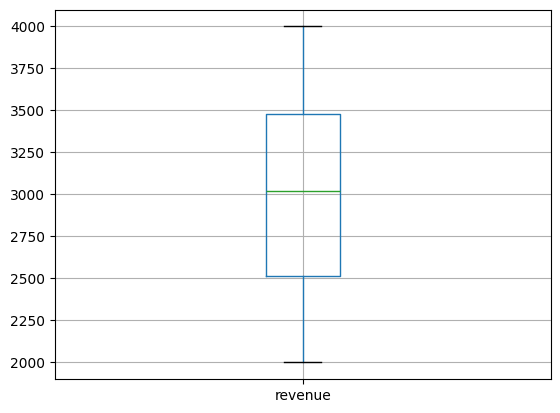

In [77]:
# box plot для тестовой группы
for_test_group.boxplot(column=['revenue'])
for_test_group.revenue.describe()

In [78]:
# box plot для нахождения выбросов в контрольной группе
for_control_group.boxplot(column=['revenue'])
for_control_group.revenue.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

In [79]:
# Применение критерия Левена для проверки равенства дисперсий. 
# Нулевая гипотеза (H0): Нет статистически значимых различий в доходах между контрольной группой и тестовой группой.
# Альтернативная гипотеза (H1): Есть статистически значимые различия в доходах между контрольной группой и тестовой группой.
levene_stat, levene_p = levene(for_control_group['revenue'],for_test_group['revenue'])

In [80]:
# Критерий Левена показал, что две группы значительно отличаются друг от друга.
# p-значение < 0.05: Это означает, что существует статистически значимая разница в дисперсиях между двумя группами. 
# Мы отвергаем нулевую гипотезу о равенстве дисперсий. 
# Другими словами, дисперсии доходов (revenue) в контрольной группе и тестовой группе различны.
(levene_stat, levene_p)

(np.float64(80.85567421779912), np.float64(3.779689868667878e-19))

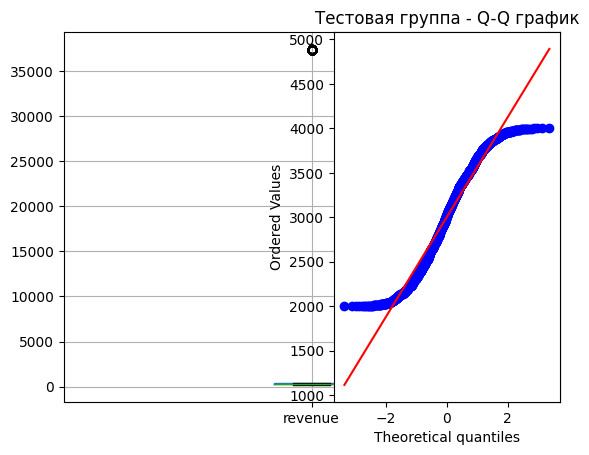

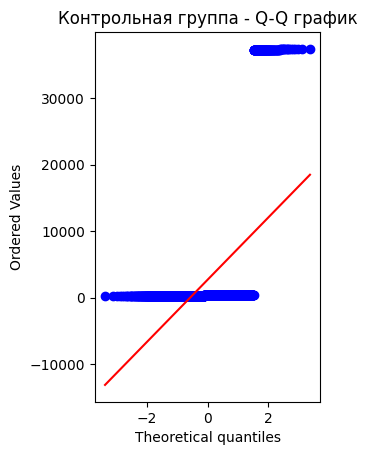

In [81]:
# Q-Q график для тестовой группы. Посмотрим как респределены данные.
plt.subplot(1, 2, 2)
stats.probplot(for_test_group['revenue'], dist="norm", plot=plt)
plt.title('Тестовая группа - Q-Q график')
plt.show()

# Q-Q график для контрольной группы
plt.subplot(1, 2, 2)
stats.probplot(for_control_group['revenue'], dist="norm", plot=plt)
plt.title('Контрольная группа - Q-Q график')
plt.show()

In [82]:
# Тест Манна-Уитни показал.
# Нулевая гипотеза (H0): Нет статистически значимых различий в распределении доходов между контрольной группой (A) и тестовой группой (B).
# Альтернативная гипотеза (H1): Есть статистически значимые различия в распределении доходов между контрольной группой (A) и тестовой группой (B).
# Поскольку p-значение (0.0) меньше уровня значимости 0.05, мы отвергаем нулевую гипотезу (H0). 
# Это означает, что есть статистически значимые различия в распределении доходов между контрольной группой (A) и тестовой группой (B).    
u_stat, p_value_mannwhitney = mannwhitneyu(for_control_group['revenue'], for_test_group['revenue'])

u_stat, p_value_mannwhitney

(np.float64(222015.0), np.float64(0.0))

# Вывод:
    # тест Манна-Уитни показывают, что тестовая группа (B) 
    # имеет статистически значимые различия по сравнению с контрольной группой (A). 
    # Таким образом, можно заключить, что изменения, введенные в тестовой группе, оказали значительное влияние на доходы.
    # Набор пердложений в тестовой группе оказался более удачным.

# Задача 3


# В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. 
# В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. 
# Для получения награды требуется пройти ряд уровней за определенное время. 
# С помощью каких метрик можно оценить результаты последнего прошедшего события?

# Для оценки результатов последнего прошедшего события в игре Plants & Gardens можно использовать следующие метрики:

# Количество участников:

    # Общее количество игроков, принявших участие в событии.
    # Процент активных игроков, участвующих в событии.

# Процент завершения:

    # Процент игроков, успешно завершивших событие и получивших награды.
    # Распределение уровней, на которых игроки остановились.

# Среднее время прохождения:

    # Среднее время, затраченное игроками на прохождение события.
    # Распределение времени прохождения по различным сегментам игроков (новички, опытные игроки и т.д.).

# Задержка выполнения:

    # Время между началом события и его завершением для каждого игрока.
    # Время, затраченное на каждый уровень.

# Монетизация и доход:

    # Доход, полученный во время события (например, через покупку бонусов или предметов, связанных с событием).
    # Процент игроков, совершивших покупки во время события.
    # Средний доход на пользователя (ARPU) и средний доход на платящего пользователя (ARPPU) во время события.

# Игровая активность:

    # Общее количество уровней, пройденных игроками во время события.
    # Среднее количество уровней, пройденных игроками в день.
    # Число игровых сессий и их продолжительность во время события.

# Вовлеченность игроков:

    # Количество игроков, вернувшихся в игру исключительно для участия в событии.
    # Число дней, в которые игроки заходили в игру в течение события.
    # Среднее количество времени, проведенного в игре ежедневно во время события.

# Социальная активность и взаимодействие:

    # Количество игроков, взаимодействующих с социальными функциями (например, отправка подарков, совместное прохождение уровней).
    # Количество упоминаний события в социальных сетях или игровых форумах.
    
# Обратная связь игроков:

    # Отзывы и комментарии игроков о событии.
    # Рейтинг события, если такая функция предусмотрена в игре.

# Технические метрики:

    # Число сбоев и ошибок, возникших во время события.
    # Время отклика сервера и общая производительность игры во время события.

# Анализ метрик:
    # 1. Анализ успешности участия: Если большинство игроков завершили событие, 
    #    это может свидетельствовать о его доступности и интересности. 
    #    Если процент завершения низок, стоит пересмотреть сложность уровней или время, отведенное на прохождение.

    # 2. Анализ вовлеченности и активности: Высокие показатели вовлеченности и активности показывают, 
    #    что событие было интересным и удерживало внимание игроков.

    # 3. Монетизация: Оценка доходов и покупок во время события помогает понять, 
    #    насколько эффективно событие стимулировало покупки.

    # 4. Обратная связь игроков: Анализ отзывов помогает выявить сильные и слабые стороны события, 
    #    что важно для улучшения будущих событий.

# Вывод:
    # Используя эти метрики, можно получить полное представление о том, как прошло событие, что понравилось игрокам, 
    # а что можно улучшить в будущем.

# Предположим, в другом событии мы усложнили механику событий так, 
    # что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. 
    # Изменится ли набор метрик оценки результата? Если да, то как?

# Усложнение механики события, при котором игрок откатывается на несколько уровней назад после неудачной попытки, 
    # может потребовать дополнительных метрик для оценки результатов. 
    # Некоторые из ранее упомянутых метрик останутся актуальными, но появятся новые важные аспекты для анализа.

# Дополнительные и измененные метрики:
# Число откатов:

    # Количество откатов (rollback) для каждого игрока.
    # Среднее количество откатов на игрока.
    # Распределение количества откатов среди всех участников события.

# Прогресс игроков:

    # Средний прогресс игроков до и после откатов.
    # Процент игроков, остановившихся на каждом уровне.
    # Максимальный достигнутый уровень до отката.

# Фрустрация и уход:

    # Количество игроков, бросивших участие в событии после нескольких откатов.
    # Анализ временных интервалов между откатами и отказом от участия.

# Повторные попытки:

    # Количество повторных попыток прохождения уровней после откатов.
    # Среднее количество повторных попыток на один откат.
    # Время, затраченное на повторные попытки.

# Анализ метрик:
    # 1. Число откатов и прогресс игроков: Высокое количество откатов может указывать на чрезмерную сложность уровней или на то, 
        # что игроки находят механику откатов слишком жесткой. Анализ прогресса игроков до и после откатов поможет понять, 
        # как они справляются с новым уровнем сложности.
    # 2. Фрустрация и уход: Если многие игроки бросают участие в событии после нескольких откатов, это может свидетельствовать 
        # о высоком уровне фрустрации. Важно следить за тем, как скоро игроки отказываются от события после первого или 
        # второго отката.
    # 3. Повторные попытки: Количество повторных попыток прохождения уровней после откатов покажет, 
        # насколько упорны игроки в своих попытках преодолеть сложные уровни, и как они реагируют на усложненную механику. 
    # 4. Обратная связь игроков: Важно собирать и анализировать отзывы игроков о новой механике откатов, чтобы понять, 
        # как они воспринимают изменения, и что можно улучшить в будущем.

# Обновленный набор метрик позволит получить более полное представление о том, 
# как игроки реагируют на усложненную механику события и какие аспекты требуют доработки для улучшения их игрового опыта. 